### Wrangling & Analyzing Twitter Data (WeRateDogs Project)
by Ismail Osman<br>
June 22, 2018<br>

**Introduction**

In this project I will be wrangling the the tweet archive of Twitter user @dog_rates in a Jupyter Notebook, 
then showcase it through analysis and visualizations using Python (and its libraries). 


In [253]:
#import all modules
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize

import matplotlib.pyplot as plt
import seaborn as sns

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
%matplotlib inline

### Data Gathering

In [254]:
# Read the twitter_archive_enhanced.csv file and 
df = pd.read_csv("twitter-archive-enhanced.csv", encoding = 'utf-8')

In [255]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [256]:
predictions = pd.read_csv("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv", sep="\t")
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [ ]:
#Importing libraries
import tweepy
from tweepy import OAuthHandler
import json
import csv
import sys
import os
import time

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# Instructions for registering Twitter app and generating access tokens:
# https://www.slickremix.com/docs/how-to-get-api-keys-and-tokens-for-twitter/
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = "DizjiQU8gJJUX6EFwqAUJcBwB"
consumer_secret = "RECntBzrT2DD4jw4V1RNEThCW5WHJodjewRqIDzfEtISZViZhD"
access_token = "276819253-F2FigwLYFpoJzWNDH4KQLi7B0ccYan7YG37zx8Gj"
access_secret = "z87BR7ulhyAt63aS7CWwsuL7amVTisXn77htoZRaplGXy"

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('data/tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))        
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start) 
print(fails_dict)

### Data 
* Retweet count
* Favorite/like count
* Hashtags
* Number of followers at time of tweet
* Number of replies to tweet

In [258]:
tweet_json = []

# read in the json file line by line into a list
with open("data/tweet_json.txt") as file:
    for line in file:
        tweet_json.append(json.loads(line))

In [259]:
tweet_json[0]

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'large': {'w': 

In [260]:
# create a data frame containing the relevant api data
api_data = pd.DataFrame({'tweet_id': [i["id_str"] for i in tweet_json], 
     'retweet_count': [i["retweet_count"] for i in tweet_json], 
     'favorite_count': [i["favorite_count"] for i in tweet_json], 
     'hashtags': [i["entities"]["hashtags"] for i in tweet_json]})

## Data Assessing 

In [261]:
df_clean = df.copy()
api_data_clean = api_data.copy()
predictions_clean = predictions.copy()

In [262]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [263]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [264]:
api_data_clean.head(10)

,tweet_id,retweet_count,favorite_count,hashtags
0,892420643555336193,8218,37718,[]
1,892177421306343426,6077,32387,[]
2,891815181378084864,4019,24387,[]
3,891689557279858688,8364,41033,[]
4,891327558926688256,9078,39219,"[{'text': 'BarkWeek', 'indices': [129, 138]}]"
5,891087950875897856,3007,19714,"[{'text': 'BarkWeek', 'indices': [129, 138]}]"
6,890971913173991426,1989,11530,[]
7,890729181411237888,18262,63599,[]
8,890609185150312448,4134,27096,"[{'text': 'BarkWeek', 'indices': [113, 122]}]"
9,890240255349198849,7140,31082,[]


In [265]:
predictions_clean.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [266]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [267]:
predictions['jpg_url'].value_counts()

https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg                                            2
https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg    2
https://pbs.twimg.com/media/C3nygbBWQAAjwcW.jpg                                            2
https://pbs.twimg.com/media/Cwx99rpW8AMk_Ie.jpg                                            2
https://pbs.twimg.com/media/CvaYgDOWgAEfjls.jpg                                            2
https://pbs.twimg.com/media/Ck2d7tJWUAEPTL3.jpg                                            2
https://pbs.twimg.com/media/CvJCabcWgAIoUxW.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/817423809049493505/pu/img/5OFW0yueFu9oTUiQ.jpg    2
https://pbs.twimg.com/media/CeRoBaxWEAABi0X.jpg                                            2
https://pbs.twimg.com/media/Crwxb5yWgAAX5P_.jpg                       

#### Twitter Json

### Quality Issues:
#### archive and api data
* Both datasets still contain non-original tweets and tweets without images

#### More quality issues should become more apparent after data tidied; currently difficult to assess. 
### Tidiness Issues:

#### Archive data

* Some tweet_ids have repeated jpg_url
* Time of day tweet sent difficult to analyze, as not in own column
* Delete columns that won't be used for analysis


## Data Cleaning 

### Action 
* Remove all retweets and tweets without images.

In [268]:
# keep only tweets that are not retweets
df_clean = df[df.retweeted_status_id.isnull()]

# tweets without expanded url's don't have images
df_clean = df[~df.expanded_urls.isnull()]

In [269]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [270]:
df2_clean = df_clean.copy()
images_clean = predictions.copy()
api_data_clean_2 = api_data_clean.copy()

In [271]:
#converting from float to integers 
df2_clean['in_reply_to_status_id'] = pd.to_numeric(df2_clean['in_reply_to_status_id'])
df2_clean['retweeted_status_id'] = pd.to_numeric(df2_clean['retweeted_status_id'])
df2_clean['retweeted_status_user_id'] = pd.to_numeric(df2_clean['retweeted_status_user_id'])

In [272]:
#converting from object to Datetime 
df2_clean['retweeted_status_timestamp'] = pd.to_datetime(df2_clean['retweeted_status_timestamp'])
df2_clean['timestamp'] = pd.to_datetime(df2_clean['timestamp'])

In [273]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2297 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2297 non-null datetime64[ns]
source                        2297 non-null object
text                          2297 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2297 non-null int64
rating_denominator            2297 non-null int64
name                          2297 non-null object
doggo                         2297 non-null object
floofer                       2297 non-null object
pupper                        2297 non-null object
puppo                         2297 non-null object
dtypes: datetime

In [274]:
#keep original ratings (no retweets) that have images
df2_clean = df2_clean[pd.isnull(df2_clean['retweeted_status_user_id'])]

In [275]:
print(sum(df2_clean.retweeted_status_user_id.value_counts()))

0


In [276]:
#Delete columns that won't be used for analysis
df2_clean = df2_clean.drop(['source',
                                     'in_reply_to_status_id',
                                     'in_reply_to_user_id',
                                     'retweeted_status_id',
                                     'retweeted_status_user_id', 
                                     'retweeted_status_timestamp', 
                                     'expanded_urls'], 1)

In [277]:
df2_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


In [278]:
#combining dog types into one single column
df2_clean = pd.melt(df2_clean, id_vars=['tweet_id',                                          
                                                    'timestamp',
                                                    'text',
                                                    'rating_numerator',
                                                    'rating_denominator',
                                                    'name'],
                    var_name='dogs', value_name='dogs_type')

#drop dogs
df2_clean =df2_clean.drop('dogs', 1)

#Sort by dogs_type then drop duplicated based on tweet_id except the last occurrence
df2_clean = df2_clean.sort_values('dogs_type').drop_duplicates(subset='tweet_id',keep='last')

In [279]:
df2_clean['dogs_type'].value_counts()

None       1779
pupper      232
doggo        72
puppo        24
floofer      10
Name: dogs_type, dtype: int64

In [280]:
# Breaking timestamp into separate day,month,and year
df2_clean['year'] = df2_clean['timestamp'].dt.year
df2_clean['month'] = df2_clean['timestamp'].dt.month
df2_clean['day'] = df2_clean['timestamp'].dt.day
df2_clean = df2_clean.drop('timestamp', 1)

In [281]:
df2_clean['rating'] = df2_clean['rating_numerator'] / df2_clean['rating_denominator']
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 2041 to 6878
Data columns (total 10 columns):
tweet_id              2117 non-null int64
text                  2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  2117 non-null object
dogs_type             2117 non-null object
year                  2117 non-null int64
month                 2117 non-null int64
day                   2117 non-null int64
rating                2117 non-null float64
dtypes: float64(1), int64(6), object(3)
memory usage: 181.9+ KB


#### Images cleaning

In [282]:
images_clean = images_clean.drop_duplicates(subset=['jpg_url'], keep='last')

In [283]:
sum(images_clean['jpg_url'].duplicated())

0

In [284]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2009 non-null int64
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 162.8+ KB


In [285]:
#Create 1 column for image prediction and 1 column for confidence level
dog_type = []
confidence_list = []

#create a function with nested if to capture the dog type and confidence level
# from the first 'true' prediction
def image(images_clean):
    if images_clean['p1_dog'] == True:
        dog_type.append(images_clean['p1'])
        confidence_list.append(images_clean['p1_conf'])
    elif images_clean['p2_dog'] == True:
        dog_type.append(images_clean['p2'])
        confidence_list.append(images_clean['p2_conf'])
    elif images_clean['p3_dog'] == True:
        dog_type.append(images_clean['p3'])
        confidence_list.append(images_clean['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_list.append('Error')

#series objects having index the image_prediction_clean column.        
images_clean.apply(image, axis=1)

#create new columns
images_clean['dog_type'] = dog_type
images_clean['confidence_list'] = confidence_list

In [286]:
#drop rows that has prediction_list with "error"
images_clean = images_clean[images_clean['dog_type'] != 'Error']

In [287]:
# Delete columns that will not be used for analysis
images_clean = images_clean.drop(['img_num', 'p1', 
                                                      'p1_conf', 'p1_dog', 
                                                      'p2', 'p2_conf', 
                                                      'p2_dog', 'p3', 
                                                      'p3_conf', 
                                                      'p3_dog'], 1)

In [288]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 4 columns):
tweet_id           1691 non-null int64
jpg_url            1691 non-null object
dog_type           1691 non-null object
confidence_list    1691 non-null object
dtypes: int64(1), object(3)
memory usage: 66.1+ KB


#### api_data_clean cleaning

In [289]:
api_data_clean_2['tweet_id'].drop_duplicates

<bound method Series.drop_duplicates of 0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
5       891087950875897856
6       890971913173991426
7       890729181411237888
8       890609185150312448
9       890240255349198849
10      890006608113172480
11      889880896479866881
12      889665388333682689
13      889638837579907072
14      889531135344209921
15      889278841981685760
16      888917238123831296
17      888804989199671297
18      888554962724278272
19      888078434458587136
20      887705289381826560
21      887517139158093824
22      887473957103951883
23      887343217045368832
24      887101392804085760
25      886983233522544640
26      886736880519319552
27      886680336477933568
28      886366144734445568
29      886267009285017600
               ...        
2309    666411507551481857
2310    666407126856765440
2311    666396247373291520
2312    666373753744588802
2313    6663627

In [290]:
# Change tweet_id to type int64 in order to merge with the other two tables
api_data_clean_2['tweet_id'] = api_data_clean_2['tweet_id'].astype('int64')

In [291]:
#merging tables in to one dataset
df3_clean = pd.merge(api_data_clean_2, 
                      images_clean, 
                      how = 'left', on = ['tweet_id'])

#keep rows that have picture (jpg_url)
df3_clean = df3_clean[df3_clean['jpg_url'].notnull()]

#TEST
df3_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1683 entries, 1 to 2338
Data columns (total 7 columns):
tweet_id           1683 non-null int64
retweet_count      1683 non-null int64
favorite_count     1683 non-null int64
hashtags           1683 non-null object
jpg_url            1683 non-null object
dog_type           1683 non-null object
confidence_list    1683 non-null object
dtypes: int64(3), object(4)
memory usage: 105.2+ KB


In [292]:
df_merge = pd.merge(df3_clean, df2_clean, 
                      how = 'left', on = ['tweet_id'])

In [293]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1683 entries, 0 to 1682
Data columns (total 16 columns):
tweet_id              1683 non-null int64
retweet_count         1683 non-null int64
favorite_count        1683 non-null int64
hashtags              1683 non-null object
jpg_url               1683 non-null object
dog_type              1683 non-null object
confidence_list       1683 non-null object
text                  1623 non-null object
rating_numerator      1623 non-null float64
rating_denominator    1623 non-null float64
name                  1623 non-null object
dogs_type             1623 non-null object
year                  1623 non-null float64
month                 1623 non-null float64
day                   1623 non-null float64
rating                1623 non-null float64
dtypes: float64(6), int64(3), object(7)
memory usage: 223.5+ KB


## Storing, analyzing, and visualizing

In [294]:
#Store the clean DataFrame in a CSV file
df_merge.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

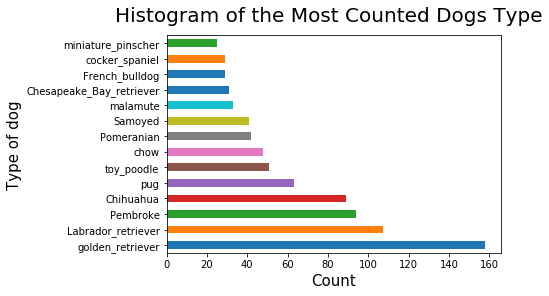

In [295]:
df_dog_type = df_merge.groupby('dog_type').filter(lambda x: len(x) >= 25)

df_dog_type['dog_type'].value_counts().plot(kind = 'barh')
plt.suptitle('Histogram of the Most Counted Dogs Type', fontsize=20)
plt.xlabel('Count',fontsize=15)
plt.ylabel('Type of dog',fontsize=15)

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

In [296]:
df_dog_type_mean = df_merge.groupby('dog_type').mean()

In [297]:
df_dog_type_mean.head()

,tweet_id,retweet_count,favorite_count,rating_numerator,rating_denominator,year,month,day,rating
dog_type,,,,,,,,,
Afghan_hound,8.171385e+17,5576.333333,7707.333333,8.000000,10.0,2016.500000,6.00,16.000000,0.800000
Airedale,7.184489e+17,1298.500000,5015.666667,9.833333,10.0,2015.583333,8.75,15.916667,0.983333
American_Staffordshire_terrier,7.597284e+17,2156.250000,8913.062500,10.312500,10.0,2016.187500,5.25,15.000000,1.031250
Appenzeller,7.939334e+17,1349.000000,6979.500000,11.000000,10.0,2016.500000,4.50,18.500000,1.100000
Australian_terrier,7.785921e+17,2881.000000,10595.000000,11.500000,10.0,2016.500000,3.50,7.000000,1.150000


In [298]:
df_dog_type_sorted = df_dog_type_mean['rating_numerator'].sort_values()
df_dog_type_sorted

dog_type
Japanese_spaniel                5.000000
Afghan_hound                    8.000000
Walker_hound                    9.000000
Scotch_terrier                  9.000000
Tibetan_terrier                 9.250000
dalmatian                       9.272727
Maltese_dog                     9.315789
Boston_bull                     9.416667
Saint_Bernard                   9.500000
Welsh_springer_spaniel          9.500000
Dandie_Dinmont                  9.571429
miniature_schnauzer             9.600000
Norwich_terrier                 9.600000
redbone                         9.666667
English_setter                  9.714286
Rhodesian_ridgeback             9.750000
Scottish_deerhound              9.750000
Irish_terrier                   9.800000
papillon                        9.833333
Airedale                        9.833333
Newfoundland                    9.857143
Mexican_hairless                9.857143
miniature_poodle                9.875000
miniature_pinscher              9.916667
Ibizan_

Text(0,0.5,'Count')

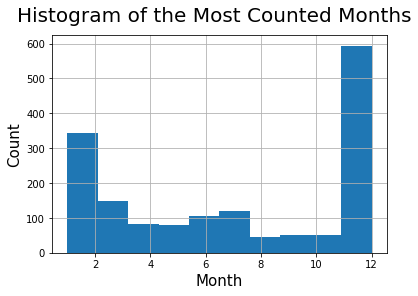

In [299]:
df_merge['month'].hist()
plt.suptitle('Histogram of the Most Counted Months', fontsize=20)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Count',fontsize=15)

#### Retweets and favorites based on the rating

Text(0,0.5,'Tweets Favorites')

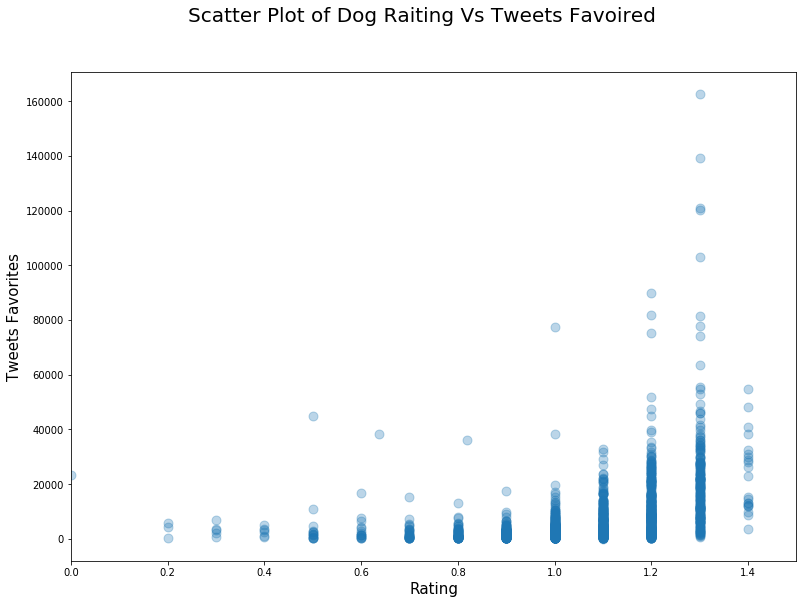

In [300]:
df_merge.plot(x='rating', y='favorite_count', kind='scatter', s= 80 ,alpha = .3, figsize = (13,9))
plt.xlim([0,1.5])
plt.suptitle('Scatter Plot of Dog Raiting Vs Tweets Favoired', fontsize=20)
plt.xlabel('Rating',fontsize=15)
plt.ylabel('Tweets Favorites',fontsize=15)

Text(0,0.5,'ReTweets')

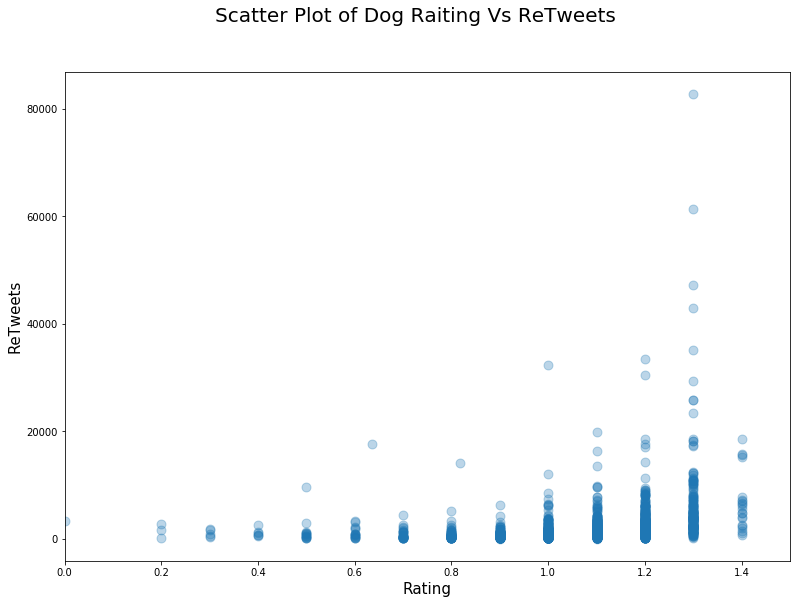

In [301]:
df_merge.plot(x='rating', y='retweet_count', kind='scatter',s= 80 ,alpha = .3, figsize = (13,9))
plt.xlim([0,1.5])
plt.suptitle('Scatter Plot of Dog Raiting Vs ReTweets', fontsize=20)
plt.xlabel('Rating', fontsize=15)
plt.ylabel('ReTweets', fontsize=15)

In [302]:
#### Dog type rating

Text(0.5,0,'Dog Type')

<Figure size 432x288 with 0 Axes>

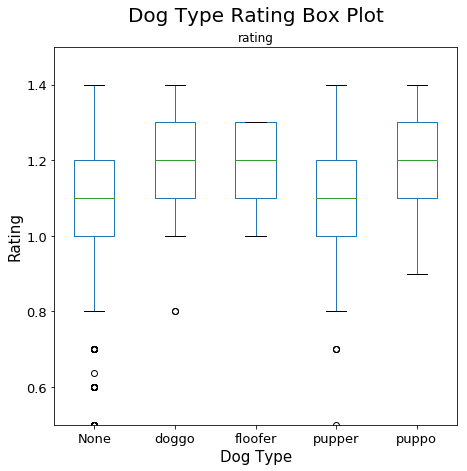

In [303]:
plt.figure()
df_merge[df_merge['dogs_type']!= ''].boxplot(column= ['rating'], by= ['dogs_type'], grid= False, fontsize = 13, figsize = (7,7))
plt.ylim(0.5,1.5)
plt.suptitle('Dog Type Rating Box Plot', fontsize=20)
plt.ylabel('Rating', fontsize=15)
plt.xlabel('Dog Type', fontsize=15)